# **In** OpenCV, an ROI (Region of Interest) is a specific area of an image selected by slicing, e.g., roi = image[y:y+h, x:x+w], for focused processing.

Rectangular ROI: roi = image[y:y+h, x:x+w] where (x, y) is the top-left corner, and w and h are the width and height.

Circular ROI: Create a mask with cv2.circle() and apply it with cv2.bitwise_and() to focus on a circular region.

Polygonal ROI: Define a mask with cv2.fillPoly() and apply it with cv2.bitwise_and() to focus on irregular shapes.

# **In this we try to perfrom roi extraction any shaped object**

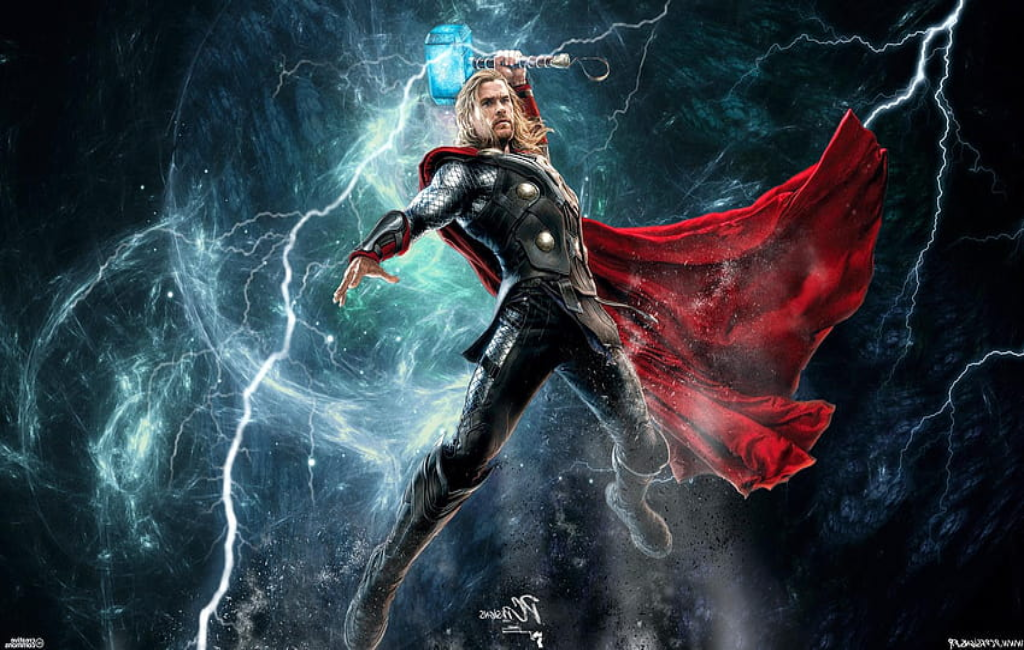

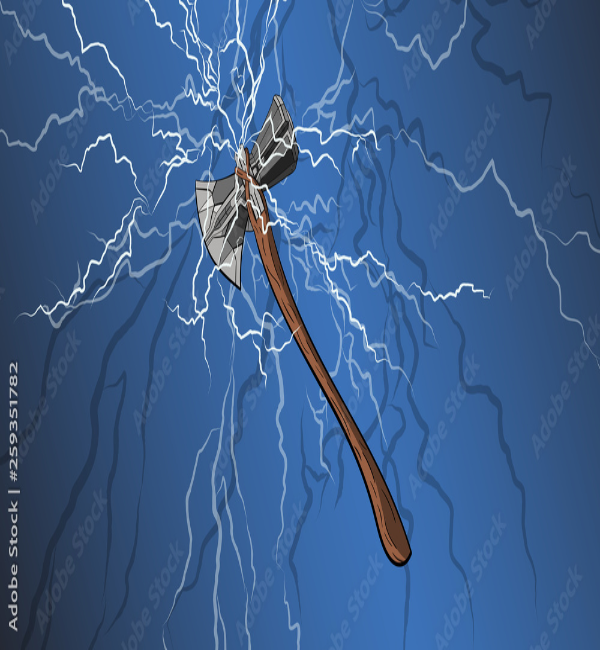

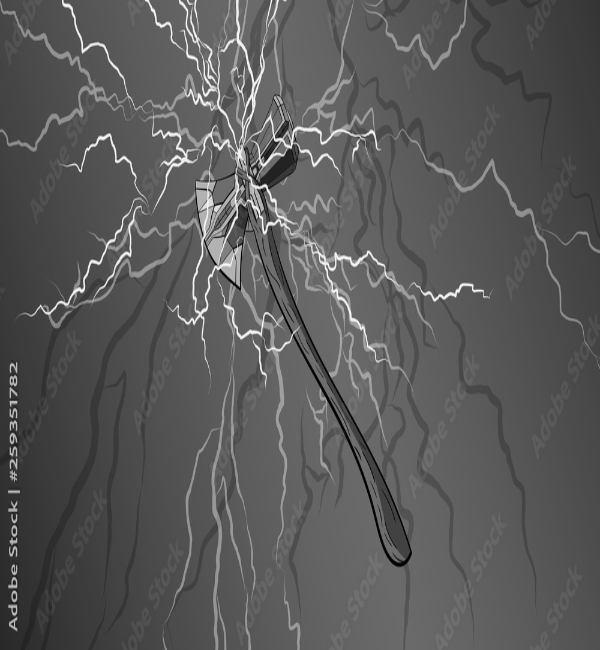

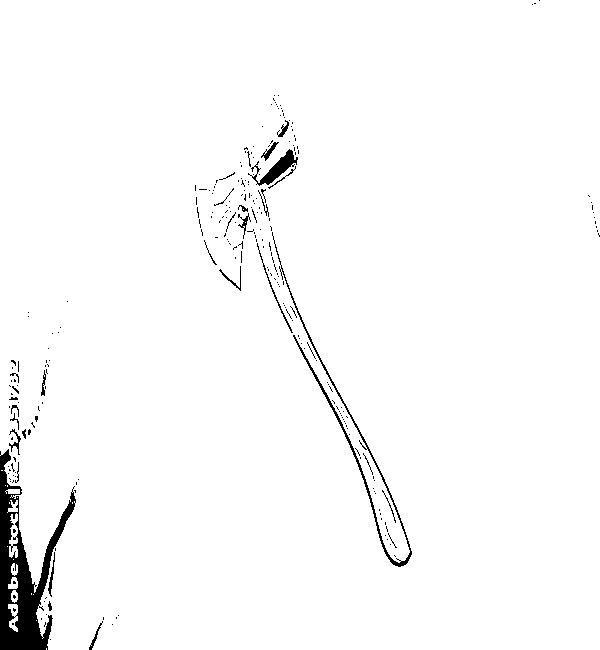

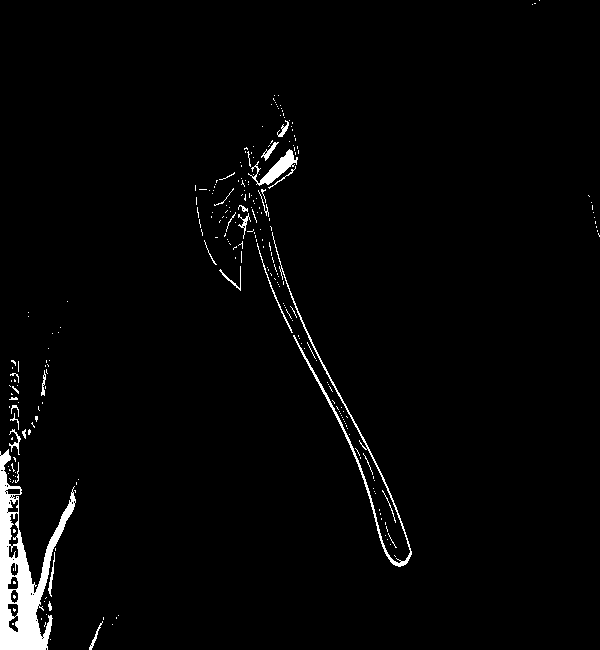

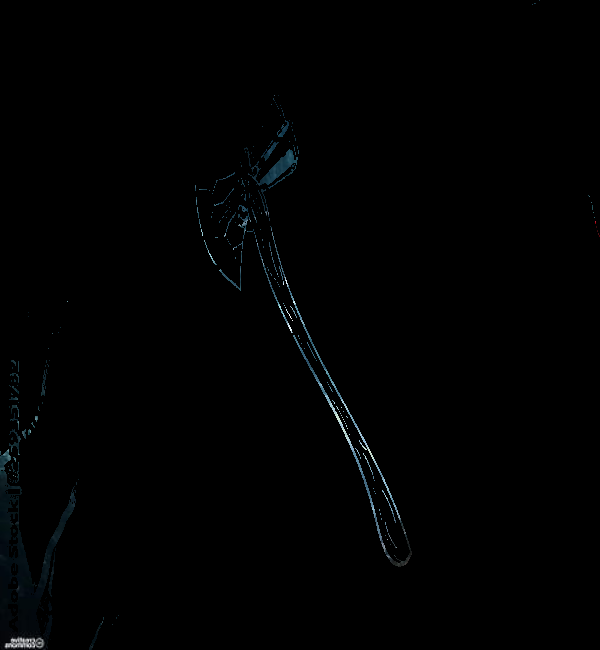

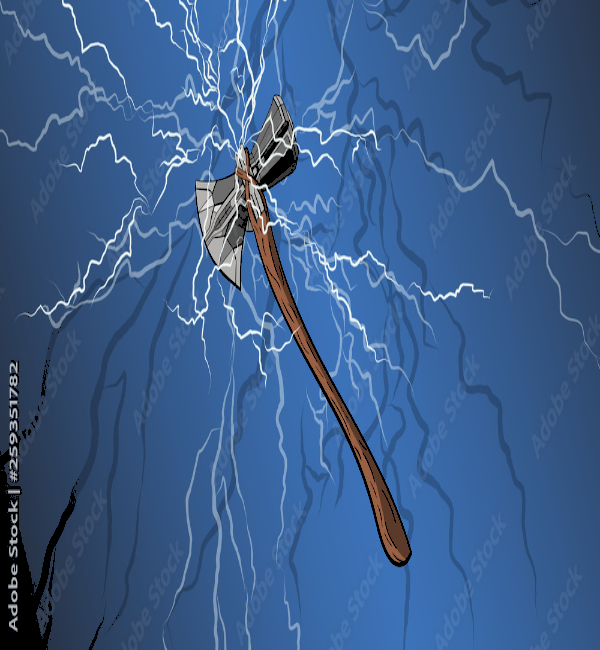

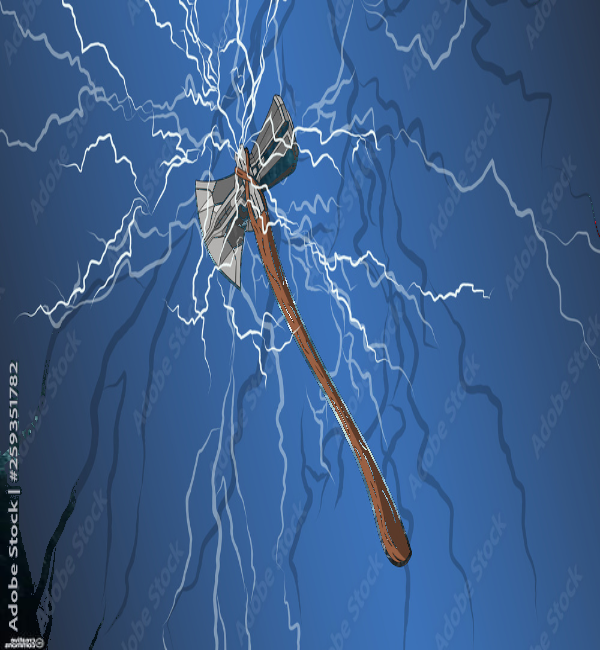

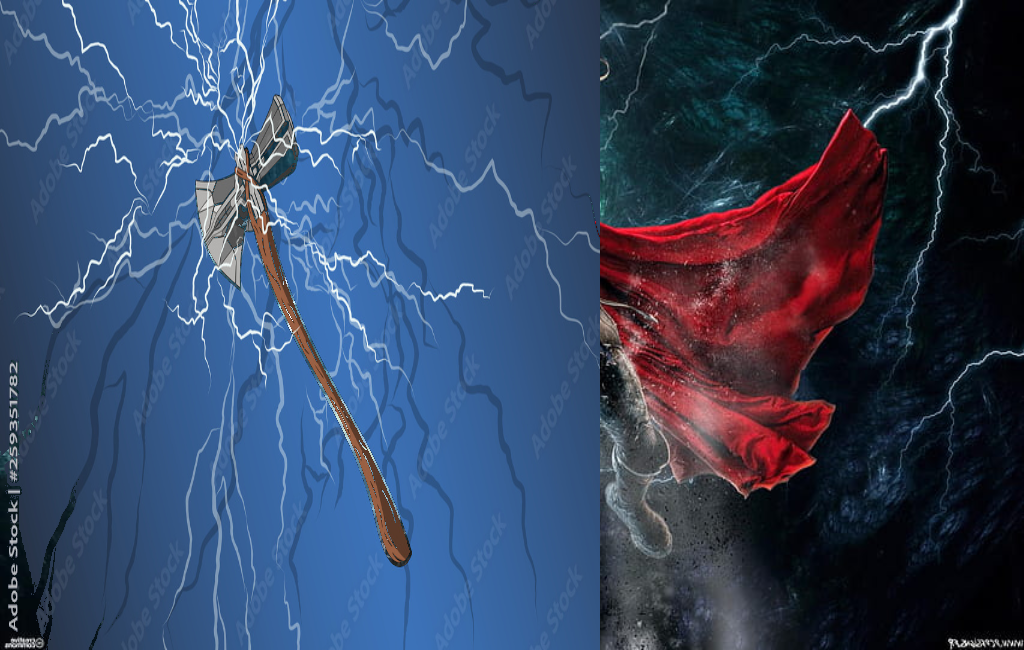

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load two images from paths on Google Drive or local Colab path
img1 = cv2.imread("/content/thr.jpg")
img2 = cv2.imread("/content/strong.jpg")

# Resize images
img1 = cv2.resize(img1, (1024, 650))
img2 = cv2.resize(img2, (600, 650))

# Define ROI based on img2's size
r, c, ch = img2.shape
roi = img1[0:r, 0:c]

# Convert img2 to grayscale
img_gry = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create mask and its inverse
_, mask = cv2.threshold(img_gry, 50, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Apply masks to isolate background and foreground
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
img2_fg = cv2.bitwise_and(img2, img2, mask=mask)

# Combine background and foreground
res = cv2.add(img1_bg, img2_fg)
final = img1.copy()
final[0:r, 0:c] = res

# Display images using cv2_imshow
cv2_imshow(img1)            # Display img1 ("Thor")
cv2_imshow(img2)            # Display img2 ("Strom breaker")
cv2_imshow(img_gry)         # Display grayscale image (Step -1 Gray)
cv2_imshow(mask)            # Display mask (Step -2 Mask)
cv2_imshow(mask_inv)        # Display inverse mask (Step -3 Mask Inverse)
cv2_imshow(img1_bg)         # Display background with mask (Step -4 Background with Mask)
cv2_imshow(img2_fg)         # Display foreground with mask (Step -5 Foreground with Mask)
cv2_imshow(res)             # Display result (Step -6 Result)
cv2_imshow(final)           # Display final image (Step 7 - Final Image)


# **Morphological** Transformations

# **In** OpenCV, morphological transformations are operations based on the shape of an image, like erosion, dilation, opening, closing, etc.

It is normally performed on binary images.

It needs two inputs, 1)- original image, 2)- structuring element(kernel).

Two basic Morphological Transformations are 1) - Erosion and 2) - Dilation


# **Erosion**
#it erodes away the boundaries of foreground object


It helpful to show the distance between the ball as compared to Mask.

kernal slides through all the image and all the pixel

from the original image conside 1 only if kernal's pixel is 1



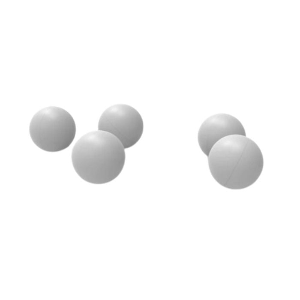

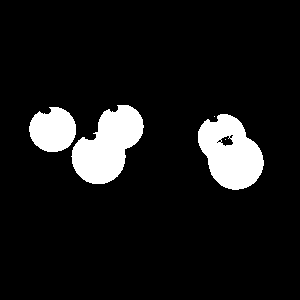

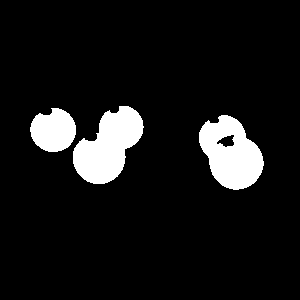

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

# Load the image in grayscale mode
img = cv2.imread('/content/ball3.jpg',0)  # Ensure the path is correct and file exists in Colab

# Resize the image to 300x300
img = cv2.resize(img, (300, 300))

# Apply binary inverse thresholding to create a mask
_, mask = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

# Define a kernel (2x2 matrix of ones)
kernel = np.ones((2, 2), np.uint8)

# Apply erosion to the mask
e = cv2.erode(mask, kernel)  # Optional: iterations=2 for stronger erosion

# Display images using cv2_imshow
cv2_imshow(img)        # Display original grayscale image
cv2_imshow(mask)       # Display threshold mask
cv2_imshow(e)          # Display result after erosion


# **Dilation**

**It is mainly focuses on black point on the  ball in the figure.**

It is just opposite of erosion.

Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’

So it inc. the white region in the image or size of foreground object in.

Normally, in cases like noise removal, erosion is followed by dilation.

Because, erosion removes white noises, but it also shrinks our object.



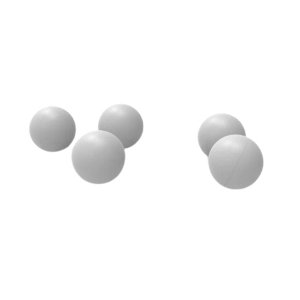

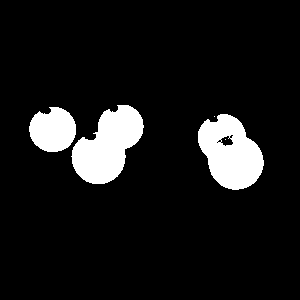

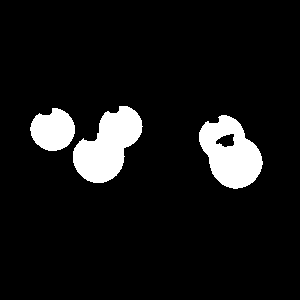

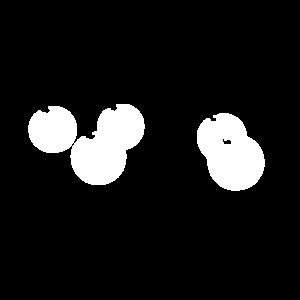

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

# Load the image in grayscale mode
img = cv2.imread('/content/ball3.jpg', 0)  # Make sure the image path is correct

# Resize the image (optional)
img = cv2.resize(img, (300, 300))

# Apply binary inverse thresholding to create a mask
_, mask = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

# Define a kernel (3x3 matrix of ones)
kernel = np.ones((3, 3), np.uint8)

# Apply erosion
e = cv2.erode(mask, kernel)

# Apply dilation
d = cv2.dilate(mask, kernel)  # Optional: iterations=2 for stronger dilation

# Display images individually using cv2_imshow
cv2_imshow(img)      # Original grayscale image
cv2_imshow(mask)     # Threshold mask
cv2_imshow(e)        # Erosion result
cv2_imshow(d)        # Dilation result
